In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob

os.sys.path.append('../')
import utilities as u
import preprocessing as pp


%load_ext autoreload
%autoreload 2

%matplotlib inline

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load session
mouse = '4139190.1'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
213,4139190.1,15_06_2018,1,TwoTower_noTimeout,56,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.1\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...
212,4139190.1,15_06_2018,3,TwoTower_noTimeout,48,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.1\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...
151,4139190.1,16_06_2018,2,TwoTower_noTimeout,59,1,2018-06-16,G:\My Drive\\VR_Data\TwoTower\4139190.1\16_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...
210,4139190.1,19_06_2018,2,TwoTower_Timeout,75,1,2018-06-19,G:\My Drive\\VR_Data\TwoTower\4139190.1\19_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...
175,4139190.1,21_06_2018,3,TwoTower_Timeout,92,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...
169,4139190.1,24_06_2018,2,TwoTower_Timeout,104,1,2018-06-24,G:\My Drive\\VR_Data\TwoTower\4139190.1\24_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
173,4139190.1,25_06_2018,2,TwoTower_Timeout,62,1,2018-06-25,G:\My Drive\\VR_Data\TwoTower\4139190.1\25_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...
205,4139190.1,27_06_2018,2,TwoTower_Timeout,81,1,2018-06-27,G:\My Drive\\VR_Data\TwoTower\4139190.1\27_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...
4,4139190.1,11_07_2018,17,TwoTower_Timeout,58,1,2018-07-11,G:\My Drive\\VR_Data\TwoTower\4139190.1\11_07_...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...
225,4139190.1,11_07_2018,17,TwoTower_Timeout,58,1,2018-07-11,G:\My Drive\\VR_Data\TwoTower\4139190.1\11_07_...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...


In [164]:
# load behavior
sess = df_mouse.iloc[5]
VRDat, C = pp.load_scan_sess(sess)
C_z = sp.stats.zscore(C,axis=0)
    

G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array


In [165]:
# by trial info and position binned neural data
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
C_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
C_morph_dict = u.trial_type_dict(C_trial_mat,trial_info['morphs'])
occ_morph_dict = u.trial_type_dict(occ_trial_mat,trial_info['morphs'])

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:308: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [166]:
print(C_morph_dict[0].shape)

(33, 90, 1637)


dict_keys(['morphs', 'max_pos', 'rewards', 'zone0_licks', 'zone1_licks', 'zone0_speed', 'zone1_speed', 'pcnt', 'wallJitter', 'towerJitter', 'bckgndJitter', 'clickOn', 'pos_lick'])


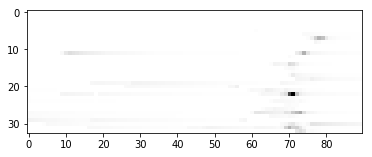

In [167]:
f,ax = plt.subplots()
ax.imshow(C_morph_dict[1][:,:,0],cmap='Greys')
print(trial_info.keys())

In [168]:
masks, FR, SI = u.place_cells_split_halves(C, VRDat['pos']._values,trial_info, VRDat['tstart']._values, VRDat['teleport']._values)

In [169]:
# statistics of place cells

# number in each environment
print('morph 0 place cells = %g out of %g , %f ' % (masks[0].sum(), masks[0].shape[0], masks[0].sum()/masks[0].shape[0]))
print('morph 1 place cells = %g out of %g, %f' % (masks[1].sum(), masks[1].shape[0], masks[1].sum()/masks[1].shape[0]))


# number with place fields in both
common_pc = np.multiply(masks[0],masks[1])
print('common place cells = %g' % common_pc.sum())
    # including, excluding reward zones

print(FR[0]['all'].shape)
FR_0_cpc = FR[0]['all'][:,common_pc]
FR_1_cpc = FR[1]['all'][:,common_pc]





morph 0 place cells = 919 out of 1637 , 0.561393 
morph 1 place cells = 958 out of 1637, 0.585217
common place cells = 563
(90, 1637)


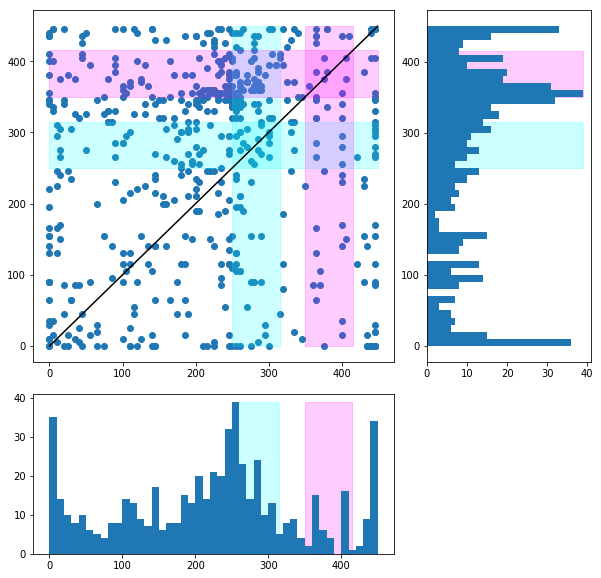

In [170]:
import matplotlib.gridspec as gridspec
f = plt.figure(figsize=[10,10])
gs = gridspec.GridSpec(3,3)
ax = f.add_subplot(gs[0:-1,0:-1])


#f,ax = plt.subplots()
ax.scatter(5.*np.argmax(FR_0_cpc,axis=0),5*np.argmax(FR_1_cpc,axis=0))
ax.plot(np.arange(450),np.arange(450),color='black')
ax.fill_between(np.arange(450),250,y2=315,color=plt.cm.cool(0),alpha=.2)
ax.fill_betweenx(np.arange(450),250,x2=315,color=plt.cm.cool(0),alpha=.2)
ax.fill_between(np.arange(450),350,y2=415,color=plt.cm.cool(1.),alpha=.2)
ax.fill_betweenx(np.arange(450),350,x2=415,color=plt.cm.cool(1.),alpha=.2)

ax1 = f.add_subplot(gs[-1,0:-1])
ax1.hist(5.*np.argmax(FR_0_cpc,axis=0),np.arange(0,460,10))
ax1.fill_betweenx(np.arange(40),250,x2=315,color=plt.cm.cool(0),alpha=.2)
ax1.fill_betweenx(np.arange(40),350,x2=415,color=plt.cm.cool(1.),alpha=.2)

ax2 = f.add_subplot(gs[0:-1,-1])
ax2.hist(5.*np.argmax(FR_1_cpc,axis=0),np.arange(0,460,10),orientation='horizontal')
ax2.fill_between(np.arange(40),250,y2=315,color=plt.cm.cool(0),alpha=.2)
ax2.fill_between(np.arange(40),350,y2=415,color=plt.cm.cool(1.),alpha=.2)

# reward zone cells

# place field shift distribution

(1637,) (919,)


(<matplotlib.figure.Figure at 0x1b008a1e320>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0047B4240>,
       dtype=object))

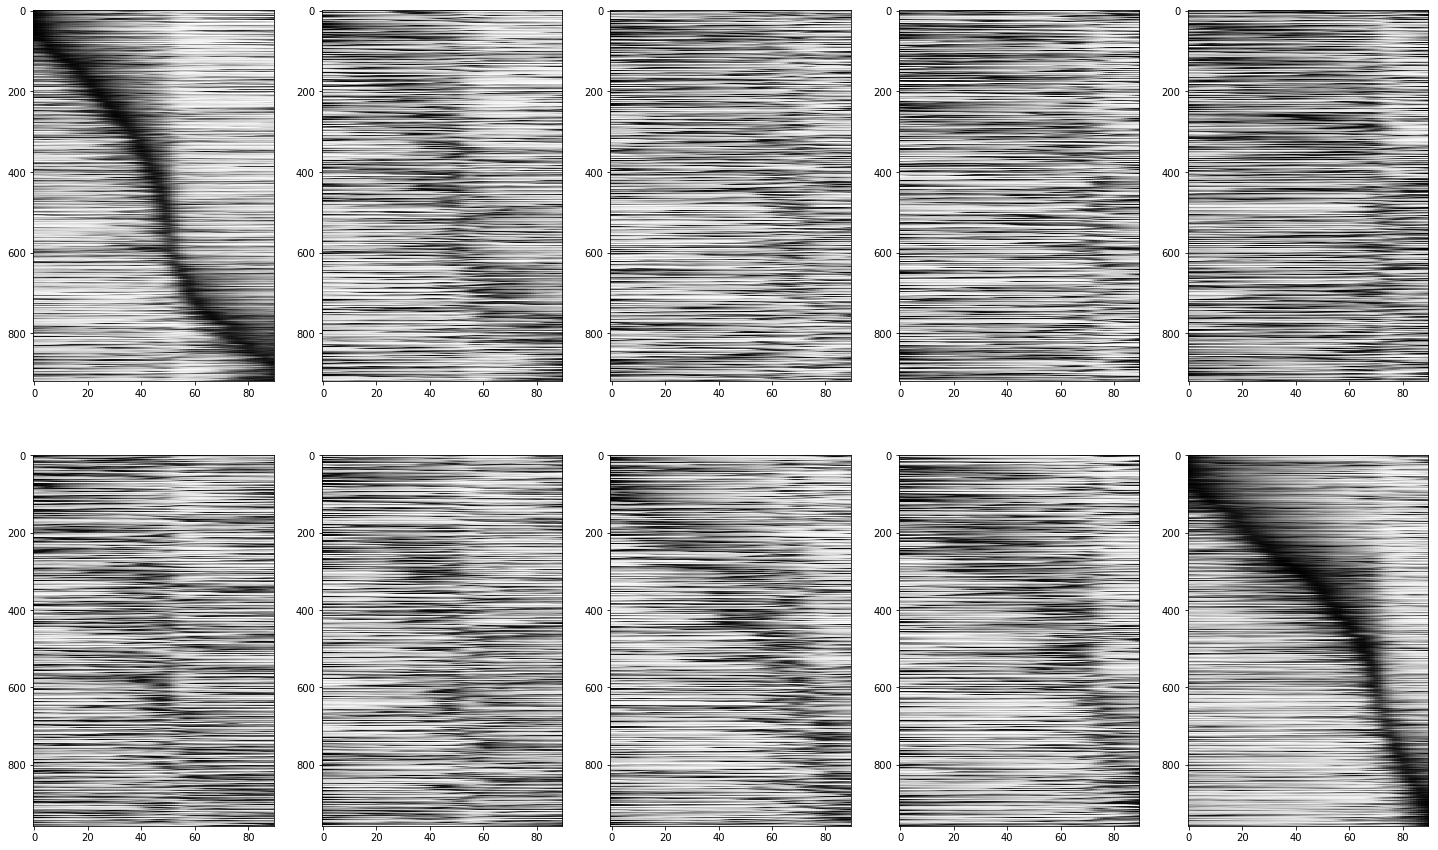

In [362]:
u.plot_placecells(C_morph_dict,masks)

# physical location of place cells

In [208]:
# define coloring scheme
ca_dat = pp.load_ca_mat(sess['scanfile'])



#subsystem#not made into numpy array


In [210]:
print(ca_dat['A_keep'].shape)
masks[0].shape

(407552, 1637)


(1637,)

In [321]:
# place cell in one environment v both
#A = np.ceil(ca_dat['A_keep'])
both = np.where((masks[0]>0) & (masks[1]>0) )[0]
none = np.where((masks[0]==0) & (masks[1]==0))[0]
m0 = np.where((masks[0]==1) & (masks[1]==0))[0]
m1 = np.where((masks[0]==0) & (masks[1]==1))[0]


# location of firing field

# reward selectivity

# LDA projection weights

In [322]:
nz = ca_dat['A_keep'].nonzero()
A= np.zeros(ca_dat['A_keep'].shape)


A[nz]=1
A[:,none]=0
A[:,both]*=.01
A[:,m0]*=-1
#A[:,m1]*=1

#A_m = np.ma.array(A)
A_m = np.ma.array(A.max(axis=1) + A.min(axis=1))
A_m[A_m==0]=np.nan

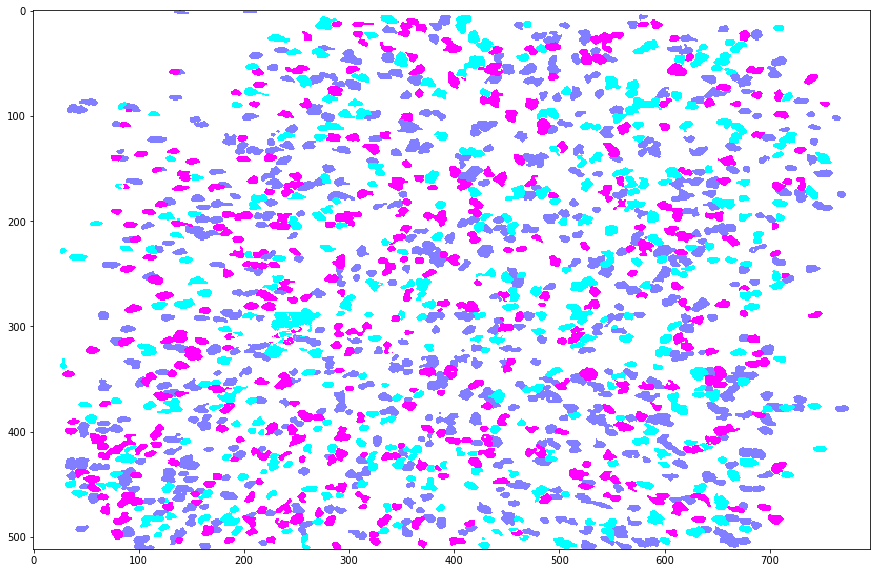

In [324]:

f, ax = plt.subplots(figsize=[15,15])
ax.imshow(np.reshape(A_m,[512,796],order='F'),cmap='cool',vmin=-1,vmax=1)

In [350]:
# reward cells
bin_edges = np.arange(5,455,5)
rzone0 = slice(45,65,1)
rzone1 = slice(65,5,1)

rscore = np.divide(FR[0]['all'][rzone0,:].sum(axis=0) + FR[1]['all'][rzone1,:].sum(axis=0),FR[0]['all'].sum(axis=0) + FR[1]['all'].sum(axis=0))
print(rscore.shape)


(1637,)


In [354]:
A= np.zeros(ca_dat['A_keep'].shape)
A[nz]=1
print(A.shape)
for i,s in enumerate(rscore.tolist()):
    A[:,i]*=s


(407552, 1637)


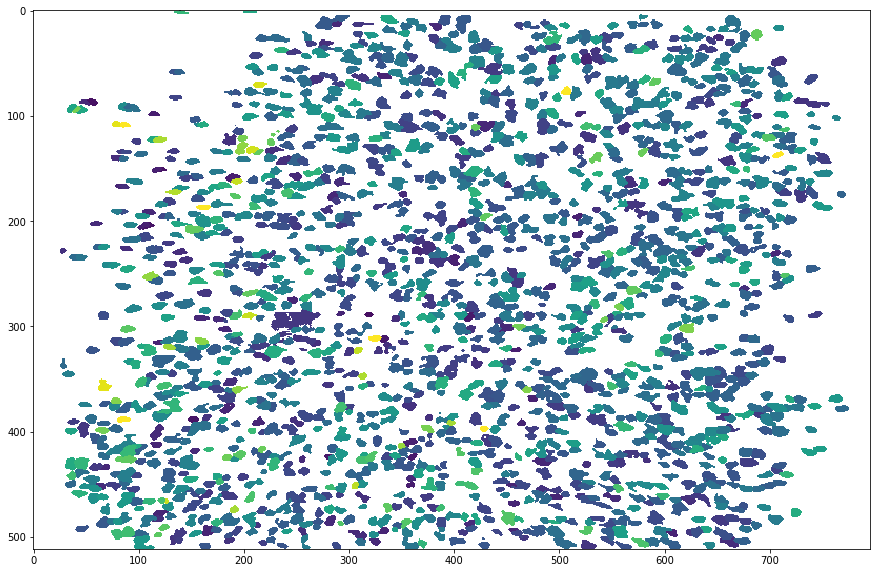

In [359]:
A_m = np.ma.array(A.max(axis=1) + A.min(axis=1))
A_m[A_m==0]=np.nan
f, ax = plt.subplots(figsize=[15,15])
ax.imshow(np.reshape(A_m,[512,796],order='F'),vmin=0,vmax=.3)